# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
#引入my_measures文件里的函数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [13]:
# ---------------------- 数据处理：function that takes raw data and completes all preprocessing required before model fits !此处为需要修改的函数-------------------------
def process_raw_data(fn, my_random_seed, test=False):
    # ---- read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    # 显示过程
    movie_data = pd.read_csv(fn, sep='\t')
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
  # 意为text = false
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # 进行HasingVectorizer处理： vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 18, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [14]:
## create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='./moviereviews_train.tsv', my_random_seed=70)
 #此处调用process_raw_data函数
print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 262144)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [15]:
# ---------------- 此处开始调用模型 ----------------
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 5273, 'TN': 4964, 'FP': 5032, 'FN': 4731, 'Accuracy': 0.51185, 'Precision': 0.5116933527413877, 'Recall': 0.5270891643342663, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [16]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 10004, 'TN': 9996, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}


### MODEL: logistic regression

In [17]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 10004, 'TN': 9996, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 9636, 'TN': 9861, 'FP': 135, 'FN': 368, 'Accuracy': 0.97485, 'Precision': 0.986183604544059, 'Recall': 0.9632147141143542, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [19]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 10004, 'TN': 9996, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [20]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 10004, 'TN': 9996, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 7977, 'TN': 7536, 'FP': 2460, 'FN': 2027, 'Accuracy': 0.77565, 'Precision': 0.7643000862316758, 'Recall': 0.7973810475809676, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

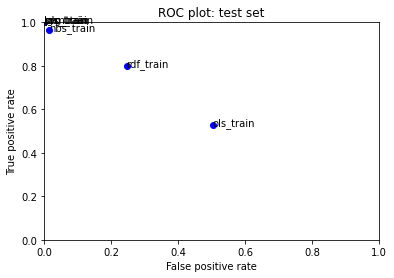

In [22]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [23]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [24]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
32
this is a terrible, terrible film!!!!!!!!!<br /><br />first of all TOOO long. the longest movie i have ever seen.<br /><br />the stories are all too Damn Over the Top!!!!<br /><br />as a matter of fact there are too many stories that the Story line is Ruined.<br /><br />the comedy wasn't Comedy!!!!! it wasn't funny at all....<br /><br />the story is so repulsive and badly written that it doesnot matter if the characters live or die.......<br /><br />i had some expectations from this movie......... but my expectations were crashed completely in the first few minutes......<br /><br />the only thing good about this movie is the MUSIC...... and obviously Vidya Balan. she gives the best performance and stands out among all the senior actors...... she's just a new comer and yet she shines and makes the rest of the cast look so Pathetic!!!!! Govinda and the Blonde who playes his love interest also help saving this Disastrous movie. Govinda perfectly fits in the

4190
OK, aside from the psychedelic background imagery, the info presented here was good. The music I could have done without (not that it was bad music, just that it didn't fit this film at all).<br /><br />As for the content of the film, the director brings up the often-lacking Pagan perspective on Christ's existence and a startling comparison of the deeds and events of Christ's life vs. the lives of mythological figures/deities such as Mithra and Dionyses. Then he brings up the chronology of Christianity's origins and presents an 'ok' case, but not one that blew me away.<br /><br />If the director had stuck with the facts and continued on with them, this film would have been good. However, at this point in the film, it disintegrates into a group of personally-gratifying attacks on Mel Gibson's \Passion of the Christ\" and a Christian private school which the director attended in his youth. During an interview with his old principal, (which during the course of, it comes to light tha

7488
I don't know who wrote the script for this movie, but from the first moment on, I was irritated. Of all possible decisions they could make up in the mountains, why do they make the decision, which is the most dangerous of all? Why do the criminals act dumb, although they managed to get a huge amount of money out of a bank and get away with it? Why doesn't the main criminal land the helicopter, shoot Stallone, grab the money and fly away with the chick as a hostage? And there are more cases of illogical behavior. I'd give this movie 5 points for nice action and great landscape scenery, but due to the illogical behavior of the characters, I just can give this movie 1 point...
* * * * * * * * * 
7595
I don't know where to begin. Tara Reid needs to be stopped before she's put in another movie. Stephen Dorff looks like he got his character's motivation from Val Kilmer in \Top Gun\". Slater sleepwalks through this dreck. The direction, editing, sound (do we really need a heavy-metal vid

10743
\I Am Curious: Yellow\" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we're treated to the site of Vincent Gallo's throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) \"double-standard\" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, and the 

14310
I have no idea as to which audience director George Schlatter hoped to sell this comedy-of-ills. With Redd Foxx in the central role and enough pimpy outfits and polyester to carpet the entire 1970s, \Norman\" plays like a blaxploitation picture combined with any number of silly sitcom episodes involving comic misunderstandings, not to mention an elongated cameo by Waylon Flowers! Based on a play by Sam Bobrick and Ron Clark, this tale of an estranged married couple (Foxx and Pearl Bailey) learning the hard way that their son is secretly gay--and living with a mincing, prancing white homosexual--has enough limp-wristed jokes to shame any early episode of \"Three's Company\". Bailey keeps her dignity, and Foxx's sheer confusion is good for a couple of chuckles, but the rest of the performers are humiliated. * from ****"
* * * * * * * * * 
14427
\Ambushed\" is no ordinary action flick. It's much to bad to be ordinary. One man walks toward another with a machine gun blazing. The othe

17599
Within 15 minutes, my whole family was rooting for Goldie Hawn's character to die, or at least for Steve Martin's character to leave her. At 40 minutes, we turned it off. There are only a couple of movies a year we try that turn out so annoying that we can't even stomach it long enough for the story to get established.<br /><br />Normally I like both Steve Martin and Goldie Hawn, and I remember enjoying the Neil Simon original. So I blame Marc Lawrence and Sam Weisman. Combine the director of \Whats The Worst That Can Happen\" and the writer of \"Miss Congeniality 2\", and I guess this is what we end up with."
* * * * * * * * * 
17739
I am sorry to fans of this film but it is the worst thing i have ever seen. Slow,badly cast and badly acted it is a film trying to escape the deadbeat romcoms of the recent years and failing! McDonald and Parker seem unable to convey real emotion and are lifeless. They seem to be in this one for any pay checks they are getting for it and not because

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [25]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 1386, 'TN': 1204, 'FP': 1300, 'FN': 1110, 'Accuracy': 0.518, 'Precision': 0.5160089352196575, 'Recall': 0.5552884615384616, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [26]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 2098, 'TN': 2057, 'FP': 447, 'FN': 398, 'Accuracy': 0.831, 'Precision': 0.824361493123772, 'Recall': 0.8405448717948718, 'desc': 'svm_test'}


### MODEL: logistic regression

In [27]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 2107, 'TN': 2036, 'FP': 468, 'FN': 389, 'Accuracy': 0.8286, 'Precision': 0.818252427184466, 'Recall': 0.8441506410256411, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [28]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 1853, 'TN': 1870, 'FP': 634, 'FN': 643, 'Accuracy': 0.7446, 'Precision': 0.7450743868114194, 'Recall': 0.7423878205128205, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [29]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 2120, 'TN': 2059, 'FP': 445, 'FN': 376, 'Accuracy': 0.8358, 'Precision': 0.8265107212475633, 'Recall': 0.8493589743589743, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [30]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 2126, 'TN': 2023, 'FP': 481, 'FN': 370, 'Accuracy': 0.8298, 'Precision': 0.8154967395473725, 'Recall': 0.8517628205128205, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [31]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 1963, 'TN': 1856, 'FP': 648, 'FN': 533, 'Accuracy': 0.7638, 'Precision': 0.7518192263500575, 'Recall': 0.7864583333333334, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

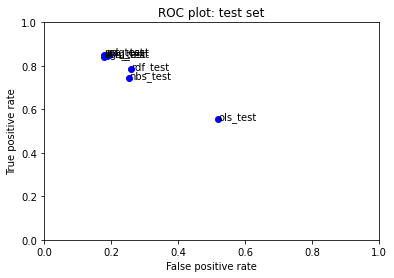

In [32]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [39]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='./moviereviews_test.tsv', my_random_seed=70, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of HashingVectorizer X:
(25000, 262144)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [40]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = prc.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.47064


In [41]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [42]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,0
2,5828_4,0
3,7186_2,0
4,12128_7,1


In [43]:
my_submission.shape

(25000, 2)

In [44]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('./moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation